# CICS 397A Final Project
### Mary Buczynski and Sophia Fortier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

%matplotlib inline

In [2]:
# Read in CSV
bread_df = pd.read_csv("breads.csv")
bread_df

,id,description,fat,sodium,carbohydrates,fiber,sugars,addedSugar,protein,calories
0,1886332,WHOLE WHEAT BREAD,1.500,170.0,19.0,3.010,3.0,NaN,5.0,100.0
1,2078782,WHOLE WHEAT BREAD,2.000,230.0,25.0,3.020,5.0,NaN,7.0,140.0
2,2071180,WHOLE WHEAT BREAD,1.500,210.0,19.0,3.000,3.0,NaN,4.0,100.0
3,2286812,WHOLE WHEAT BREAD,1.000,170.0,19.0,3.010,3.0,NaN,5.0,100.0
4,1957492,WHOLE WHEAT BREAD,0.998,135.0,13.0,1.980,2.0,0.992,4.0,70.1
...,...,...,...,...,...,...,...,...,...,...
154,2095447,PRETZEL CHALLAH,2.500,130.0,25.0,0.990,4.0,NaN,4.0,140.0
155,1918250,RAISIN CHALLAH,3.500,250.0,32.0,2.000,6.0,NaN,10.0,200.0
156,2275196,ROUND CHALLAH,2.000,94.9,14.0,0.000,3.0,NaN,2.0,80.1
157,1922607,SQUARE CHALLAH,2.000,100.0,12.0,0.000,2.0,NaN,2.0,80.1


In [3]:
# Cleaning up the data

bread_df = bread_df.drop("id", axis=1) # Removing id column
bread_df = bread_df.drop("addedSugar", axis=1) # Removing addedSugar since most values are NaN

def fillCols(col):
    if col.name in ('fat', 'sodium', 'carbohydrates', 'fiber', 'sugars', 'protein', 'calories'):
        col = col.fillna(col.mean())
    return col

bread_df = bread_df.apply(fillCols) # Filling in the null values with the column mean
bread_df

,description,fat,sodium,carbohydrates,fiber,sugars,protein,calories
0,WHOLE WHEAT BREAD,1.500,170.0,19.0,3.010,3.0,5.0,100.0
1,WHOLE WHEAT BREAD,2.000,230.0,25.0,3.020,5.0,7.0,140.0
2,WHOLE WHEAT BREAD,1.500,210.0,19.0,3.000,3.0,4.0,100.0
3,WHOLE WHEAT BREAD,1.000,170.0,19.0,3.010,3.0,5.0,100.0
4,WHOLE WHEAT BREAD,0.998,135.0,13.0,1.980,2.0,4.0,70.1
...,...,...,...,...,...,...,...,...
154,PRETZEL CHALLAH,2.500,130.0,25.0,0.990,4.0,4.0,140.0
155,RAISIN CHALLAH,3.500,250.0,32.0,2.000,6.0,10.0,200.0
156,ROUND CHALLAH,2.000,94.9,14.0,0.000,3.0,2.0,80.1
157,SQUARE CHALLAH,2.000,100.0,12.0,0.000,2.0,2.0,80.1


## Agglomerative Clustering

In [4]:
clust_columns = ["fat", "sodium", "sugars"] # clustering on nutrients that are unhealthy in high quantities

num_clusts = 8

linkage_type = "ward"

cluster_df = bread_df[clust_columns].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

clustering = AgglomerativeClustering(n_clusters=num_clusts, linkage=linkage_type).fit(scaled_data)

cluster_df["cluster"] = clustering.labels_
bread_df["cluster"] = cluster_df["cluster"]
bread_df

,description,fat,sodium,carbohydrates,fiber,sugars,protein,calories,cluster
0,WHOLE WHEAT BREAD,1.500,170.0,19.0,3.010,3.0,5.0,100.0,4
1,WHOLE WHEAT BREAD,2.000,230.0,25.0,3.020,5.0,7.0,140.0,7
2,WHOLE WHEAT BREAD,1.500,210.0,19.0,3.000,3.0,4.0,100.0,4
3,WHOLE WHEAT BREAD,1.000,170.0,19.0,3.010,3.0,5.0,100.0,4
4,WHOLE WHEAT BREAD,0.998,135.0,13.0,1.980,2.0,4.0,70.1,5
...,...,...,...,...,...,...,...,...,...
154,PRETZEL CHALLAH,2.500,130.0,25.0,0.990,4.0,4.0,140.0,7
155,RAISIN CHALLAH,3.500,250.0,32.0,2.000,6.0,10.0,200.0,1
156,ROUND CHALLAH,2.000,94.9,14.0,0.000,3.0,2.0,80.1,5
157,SQUARE CHALLAH,2.000,100.0,12.0,0.000,2.0,2.0,80.1,5


In [5]:
cluster_breads = {}
for index, row in bread_df.reset_index()[['index', 'description', 'cluster']].iterrows():
    clust = row["cluster"]
    cluster_breads.setdefault(clust, []).append(row)
    
for cluster, rows in cluster_breads.items(): # displaying clusters
    print("cluster {} ({})".format(int(cluster), len(rows)))
    rows_tuples = [ tuple(row) for row in rows ]
    for row in sorted(rows_tuples, key=lambda x: x[0]):
        print("\t", row)
    print("\n")

cluster 4 (37)
	 (0, 'WHOLE WHEAT BREAD', 4)
	 (2, 'WHOLE WHEAT BREAD', 4)
	 (3, 'WHOLE WHEAT BREAD', 4)
	 (7, 'WHOLE WHEAT BREAD', 4)
	 (8, 'WHOLE WHEAT BREAD', 4)
	 (9, 'WHOLE WHEAT BREAD', 4)
	 (10, 'WHOLE WHEAT BREAD', 4)
	 (27, 'SOURDOUGH BREAD, SOURDOUGH', 4)
	 (30, 'SOURDOUGH BREAD, SOURDOUGH', 4)
	 (31, 'WHITE BREAD', 4)
	 (33, 'WHITE BREAD', 4)
	 (34, 'WHITE BREAD', 4)
	 (35, 'WHITE BREAD', 4)
	 (38, 'WHITE BREAD', 4)
	 (40, 'WHITE BREAD', 4)
	 (42, 'WHITE BREAD', 4)
	 (45, 'WHITE BREAD', 4)
	 (49, 'WHITE BREAD', 4)
	 (51, 'MULTIGRAIN BREAD', 4)
	 (54, 'MULTIGRAIN BREAD', 4)
	 (55, 'MULTIGRAIN BREAD', 4)
	 (60, 'MULTIGRAIN BREAD', 4)
	 (64, 'MULTIGRAIN BREAD', 4)
	 (67, 'MULTIGRAIN BREAD', 4)
	 (68, 'MULTIGRAIN BREAD', 4)
	 (71, 'RYE BREAD', 4)
	 (84, 'CIABATTA', 4)
	 (122, 'BAGUETTE CRISPS', 4)
	 (130, 'BRIOCHE ROLLS, BRIOCHE', 4)
	 (135, 'BRIOCHE BAKERY BREAD, BRIOCHE', 4)
	 (136, 'BRIOCHE BAKERY BREAD, BRIOCHE', 4)
	 (137, 'BRIOCHE BAKERY BREAD, BRIOCHE', 4)
	 (138, 'BRIOCH

In [6]:
bread_df = bread_df.drop(columns="cluster", axis = 1) # removing cluster column for next steps

## Supervised Learning

In [7]:
# Adding healthier vs. unhealthier class labels
def add_label(s):
    artisan = ["SOURDOUGH", "WHOLE WHEAT", "MULTIGRAIN", "RYE", "PUMPERNICKEL"]
    label = "Not Healthy"
    for bread_type in artisan:
        if bread_type in s:
            label = "Healthy"
    return label

bread_df['category'] = bread_df['description'].map(add_label)
bread_df

,description,fat,sodium,carbohydrates,fiber,sugars,protein,calories,category
0,WHOLE WHEAT BREAD,1.500,170.0,19.0,3.010,3.0,5.0,100.0,Healthy
1,WHOLE WHEAT BREAD,2.000,230.0,25.0,3.020,5.0,7.0,140.0,Healthy
2,WHOLE WHEAT BREAD,1.500,210.0,19.0,3.000,3.0,4.0,100.0,Healthy
3,WHOLE WHEAT BREAD,1.000,170.0,19.0,3.010,3.0,5.0,100.0,Healthy
4,WHOLE WHEAT BREAD,0.998,135.0,13.0,1.980,2.0,4.0,70.1,Healthy
...,...,...,...,...,...,...,...,...,...
154,PRETZEL CHALLAH,2.500,130.0,25.0,0.990,4.0,4.0,140.0,Not Healthy
155,RAISIN CHALLAH,3.500,250.0,32.0,2.000,6.0,10.0,200.0,Not Healthy
156,ROUND CHALLAH,2.000,94.9,14.0,0.000,3.0,2.0,80.1,Not Healthy
157,SQUARE CHALLAH,2.000,100.0,12.0,0.000,2.0,2.0,80.1,Not Healthy


In [8]:
y = bread_df["category"]
x = bread_df.drop(["category", "description"], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [9]:
clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

recall = metrics.recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

Accuracy: 0.78125
Recall: 0.7823529411764706
Precision: 0.783203125


## Visualization

<AxesSubplot:>

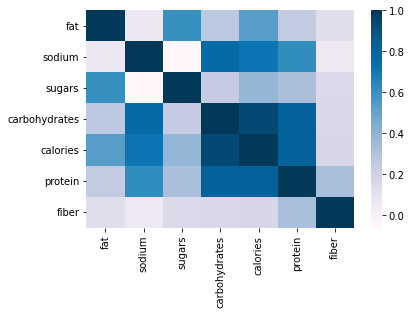

In [10]:
# Heat Map

sns.heatmap(bread_df[["fat", "sodium", "sugars", "carbohydrates", "calories", "protein", "fiber"]].corr(), cmap="PuBu")            

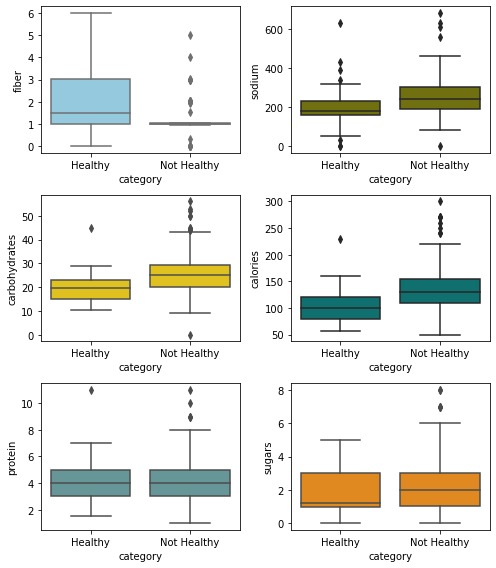

In [11]:
# Facetted Boxplots

fig, axs = plt.subplots(3, 2, figsize=(7, 8))

sns.boxplot(data=bread_df, x='category', y="fiber", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=bread_df, x='category', y="sodium", color="olive", ax=axs[0, 1])
sns.boxplot(data=bread_df, x='category', y="carbohydrates", color="gold", ax=axs[1, 0])
sns.boxplot(data=bread_df, x='category', y="calories", color="teal", ax=axs[1, 1])
sns.boxplot(data=bread_df, x='category', y="protein", color="cadetblue", ax=axs[2, 0])
sns.boxplot(data=bread_df, x='category', y="sugars", color="darkorange", ax=axs[2, 1])

fig.tight_layout()

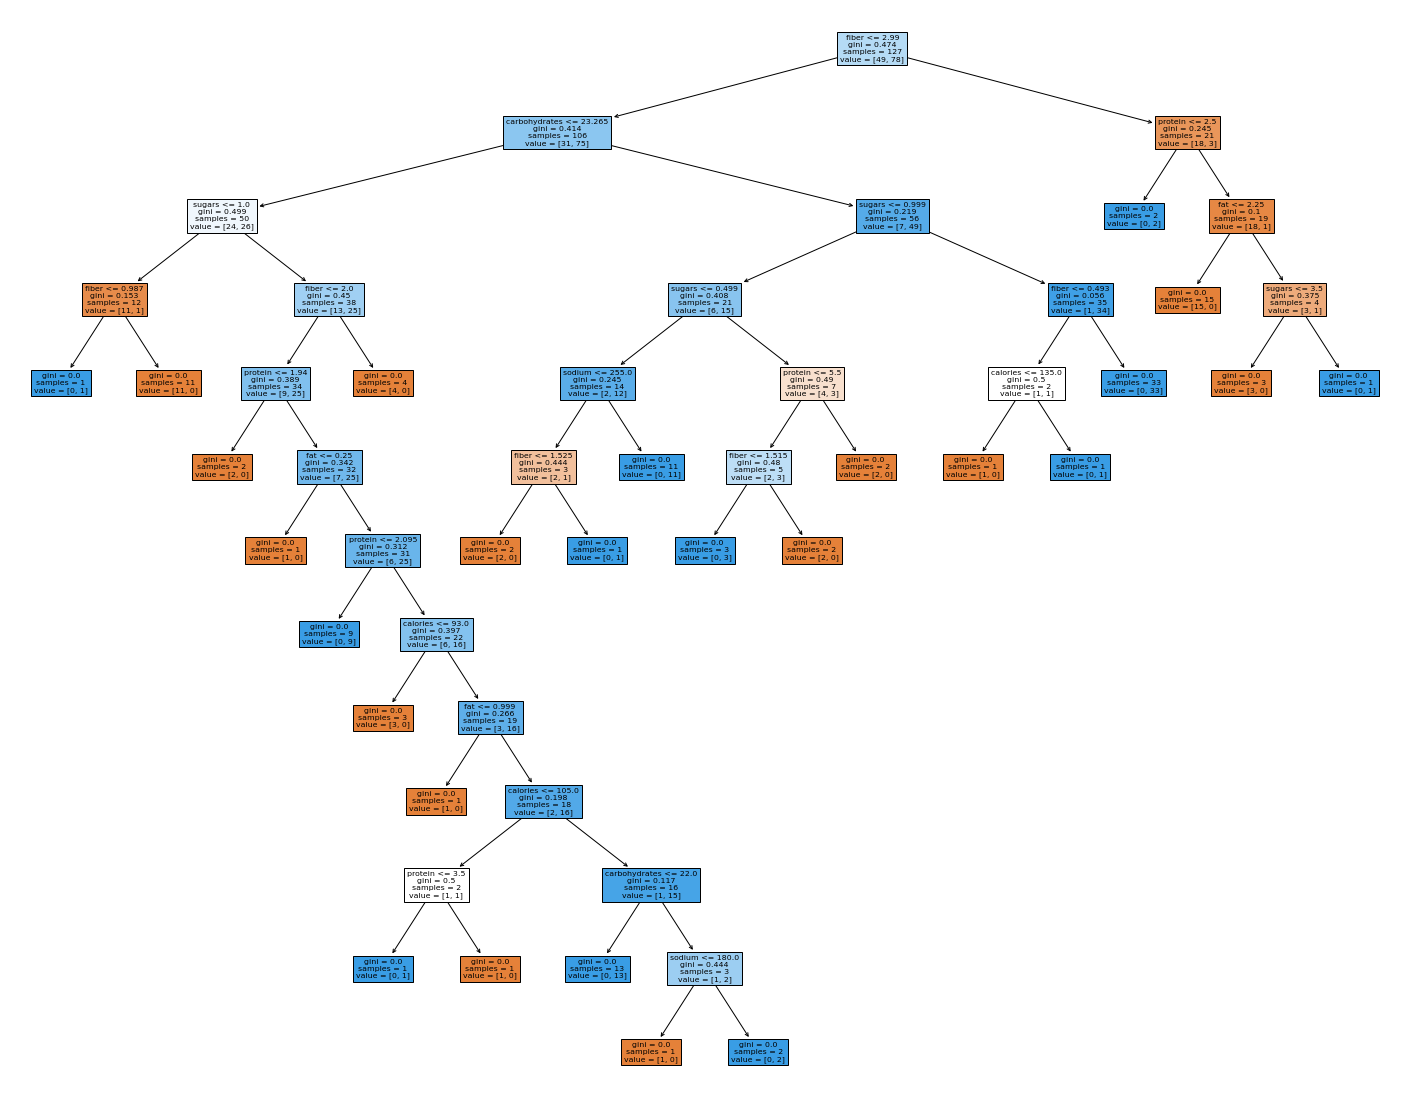

In [12]:
# Decision Tree Diagram

list_nutrients = ['fat', 'sodium', 'carbohydrates', 'fiber', 'sugars', 'protein', 'calories']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names = list_nutrients, filled=True)